In [75]:
import json
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import pickle

% matplotlib inline 

Before taking a closer look at the ratings we will consider the metadata dataset. In this dataset we will amongst other things find information about title, price, description, and the products each product is related to. In order to examine the metadata, we load part of it into a data frame to be able to see it and do some descriptive statistics.

In [66]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l)

In [67]:
meta = parse('metadata.json.gz')

We observe that by using the code provided on the website we load the data as a generate object. For the we use the keyword next in order to look through the data. For now, we will just examine the first data points and load all of it into a data frame. As shown in the code we were loading the first 1 million data points, but in the end we had to stop the run before time and ended up with a data frame with 137.885 records.

In [ ]:
df = pd.DataFrame([])
for i in range(0,1000000):
    x = next(meta) #next item in the generator
    df2 = pd.DataFrame.from_dict(x,orient='index').transpose()
    df = df.append(df2,ignore_index=True)

To save time and be able to use the same data in different notebooks, we pickle the dataframe and load it again.

In [ ]:
pickling_on = open("df1.pickle","wb")
pickle.dump(df, pickling_on)
pickling_on.close()

In [72]:
pickle_off = open("df.pickle","rb")
dfMeta = pickle.load(pickle_off)

We now inspect the data frame containing the meta data.

In [103]:
dfMeta.head(5)

,asin,brand,categories,description,imUrl,price,related,salesRank,title
0,0060885521,NaN,[[Books]],This straightforward chronology of Laura Ingal...,http://ecx.images-amazon.com/images/I/51mxgPwD...,14.91,"{'bought_together': ['0060724927', '0060278420...",{'Books': 32650},Laura Ingalls Wilder: A Biography (Little House)
1,0060885343,NaN,[[Books]],"Jane Buckingham is the president of Trendera, ...",http://ecx.images-amazon.com/images/I/51bPCBrA...,4.74,"{'bought_together': ['0060734167'], 'also_boug...",{'Books': 37792},The Modern Girl's Guide to Motherhood
2,006088617X,NaN,[[Books]],NaN,http://ecx.images-amazon.com/images/I/51TXrfXI...,4.74,"{'also_bought': ['0060886188', '0060886161', '...",{'Books': 662216},"Castaway Colt (Wild Horse Island, No. 4)"
3,0060885629,NaN,[[Books]],Formerly a curator at the Smithsonian's Nation...,http://ecx.images-amazon.com/images/I/51n4gr7z...,24.22,"{'bought_together': ['1137278285'], 'also_boug...",{'Books': 235353},The Star-Spangled Banner: The Making of an Ame...
4,0060887354,NaN,[[Books]],"'Gritty, intimate and revealing' Heat 'Addicti...",http://ecx.images-amazon.com/images/I/4130FD5A...,6.56,"{'bought_together': ['0062009540', '0060887389...",{'Books': 689138},"Flawless (Pretty Little Liars, Book 2)"


We see that we have nine columns in total:

- asin (This is the id of the product)
- brand
- categories (list of different categories, that the product belongs to)
- description (can be very long, e.g. a book summary)
- imUrl (URL to picture of the product)
- price
- related (dictionary of different features concerning related products. In particular: also_bpught, also_viewed, boght_together)
- salesRank (ranking of product within their category based on how much it sells)
- title

Most of these things are observable from the dataset, but some things needed a seperate explaination such as the salesRank, which we found on Amazon.com.

In order to manually see if something is off with the data, e.g. unexpected or missing values, we export the first 2000 records to an html table and take a look at that file. Here is shown the first five records. 

In [102]:
dfMeta[:2000].to_html('Metasubset.html')

**Observations form the inspection of the HTML table:**

In the html table we see that there are many missing values also within the important attributes such as price and salesRank. This is going to cause some issue in the further analysis and there for the strategy for the handling of this is important. We want to later examine the correlations between price and ratings and rating and SalesRank. In that sense it might be interesting to see which categories have the least missing values in order to select those categories for these kinds of analysis. 

Another thing that is noticed, is that apart from having missing values the Brand column also contains values called ‘Unknown’. This indicate that a seller at Amazon can mark the brand as ‘Unknown’ as well as just not putting any value. As long a we keep this in mind it should not be a problem later.

*Some of these observations has been made on different subsets of the meta data*


Another interesting thing can be to look at the distribution of the variables. Here we take a look at the price distribution.

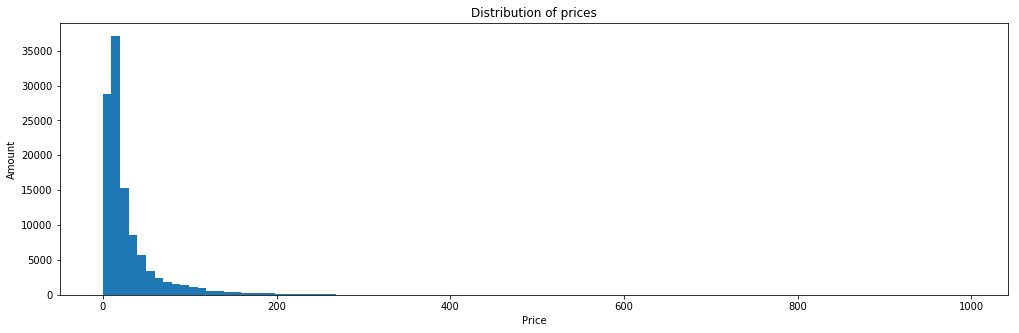

In [79]:
#Figure, histogram
plt.rcParams['figure.figsize'] = (17, 5)

plt.hist(dfMeta['price'].dropna(), bins=100)

plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Amount')
plt.show()

In [104]:
dfMeta['price'].max()

992.75

From this plot we observe that most of the products are priced between 0\$ and 100\$. However a few products have very high prices and for our subset of the data up to almost 1000$